In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# All csv file paths with data
sample_submission_path = "/kaggle/input/spaceship-titanic/sample_submission.csv"
train_path = "/kaggle/input/spaceship-titanic/train.csv"
test_path = "/kaggle/input/spaceship-titanic/test.csv"

train = pd.read_csv(train_path) # train set
test = pd.read_csv(test_path) # test set

# Submission format - (PassenderId, Transported)
sample_submission = pd.read_csv(sample_submission_path)

train.head(100)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
96,0103_02,Earth,True,G/18/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
97,0103_03,Earth,True,G/18/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False


Info about first 10 passengers: every passenger has HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name

In [3]:
test.shape

(4277, 13)

We have 12 features for passenger id and 4277 passengers. 
Next, take a look at the basic statistics of the dataset:

In [4]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [5]:
test.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


Age - The data ranges from 0 to 79:

Mean age is ~28.8 y.o. 

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - These features have many zero entries.

Cabins are highly unique, we can split this into the deck and side features. 

Earth is the most frequent home planet

Check for missing data in the dataset:

In [6]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / train.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.head(10)

,Missing Values,Percentage
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


The data is not full. We can fill in these missing values using appropriate strategies based on the type of data:


In [7]:
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0]).astype(bool)
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0]).astype(bool)

train['VIP'] = train['VIP'].fillna(train['VIP'].mode()[0]).astype(bool)
test['VIP'] = test['VIP'].fillna(test['VIP'].mode()[0]).astype(bool)

train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0]).astype(str)
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0]).astype(str)

train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0]).astype(str)
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0]).astype(str)

train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].median())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].median())

train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].median())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].median())

train['Spa'] = train['Spa'].fillna(train['Spa'].median())
test['Spa'] = test['Spa'].fillna(test['Spa'].median())

train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].median())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].median())

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

I think name is unnecessary now and we can drop it:

In [8]:
train.drop(columns=['Name'], inplace=True)
test.drop(columns=['Name'], inplace=True)

Analyze frequency of transported passengers:

In [9]:
transported = train[train['Transported'] == 1]
not_transported = train[train['Transported'] == 0] 

Transported: 4378 (50.4%)

Not Transported: 4315 (49.6%)

Total: 8693

It seems to me, passengers with VIP status have more chances to be transported

In [10]:
train.groupby('VIP').Transported.value_counts()

VIP    Transported
False  True           4302
       False          4192
True   False           123
       True             76
Name: count, dtype: int64

<Axes: xlabel='VIP', ylabel='Transported'>

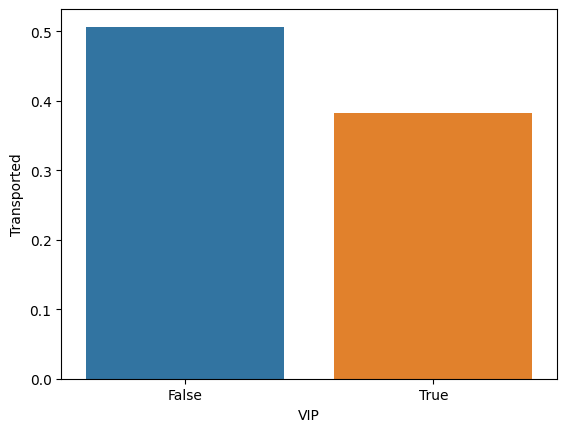

In [11]:
sns.barplot(x='VIP', y='Transported', data=train, errorbar=None)

But unfortunately, my intuition failed me, because VIP passengers had slightly lower transport rates compared to non-VIP passengers. Maybe it depends on Age:

<Axes: ylabel='Count'>

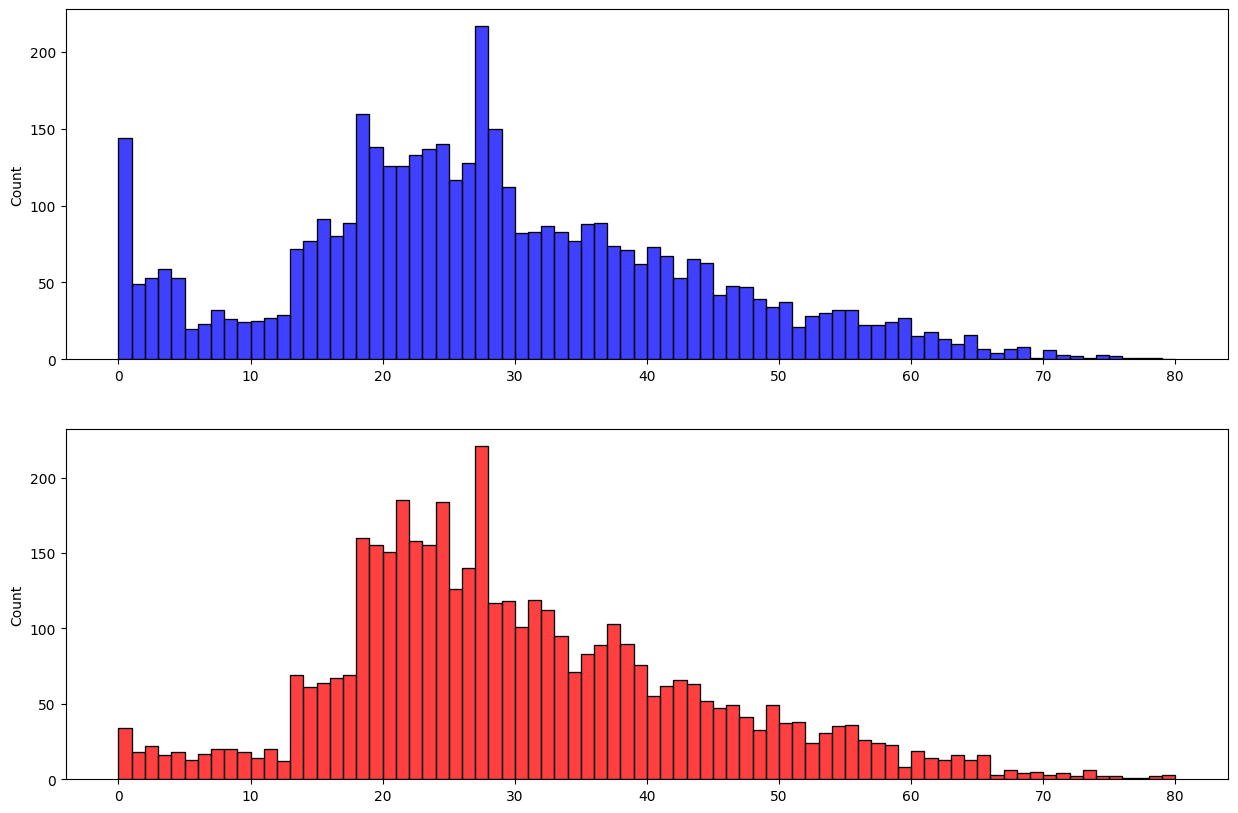

In [12]:
train['Age'] = train['Age'].replace([np.inf, -np.inf], np.nan)
train['Age'] = train['Age'].fillna(train['Age'].median())

total_transported = train[train['Transported'] == 1]
total_not_transported = train[train['Transported'] == 0] 

fig = plt.figure(figsize=[15,10])

ax1 = fig.add_subplot(211)
sns.histplot(total_transported['Age'].values, bins=range(0, 81, 1), kde=False, color='blue', ax=ax1)

ax2 = fig.add_subplot(212)
sns.histplot(total_not_transported['Age'].values, bins=range(0, 81, 1), kde=False, color='red', ax=ax2)

This indicates that age does not appear to have a strong correlation with being transported.

Let's see on correlation matrix

In [13]:
corr_matrix = train[["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]].corr()
corr_matrix

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.246658,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Age,-0.071323,1.000000,0.091863,0.068587,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,-0.078281,0.091863,1.000000,0.057173,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,-0.246658,0.068587,0.057173,1.000000,-0.015539,0.053249,0.009683,-0.018660,-0.244611
FoodCourt,-0.205928,0.127390,0.125499,-0.015539,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,-0.207798,0.033148,0.018412,0.053249,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,-0.198307,0.120946,0.060991,0.009683,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,-0.192721,0.099590,0.123061,-0.018660,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,0.460132,-0.074233,-0.037261,-0.244611,0.045583,0.009391,-0.218545,-0.204874,1.000000


<Axes: >

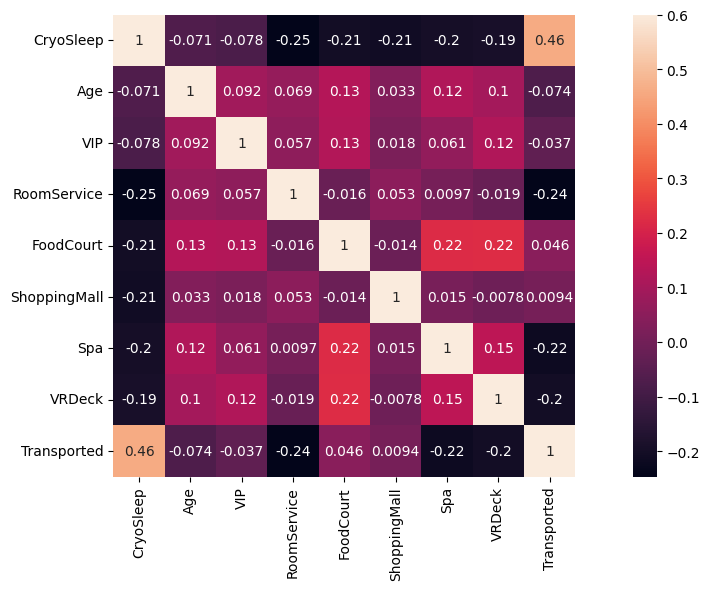

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

CryoSleep: The strongest positive correlation with being transported

Age: There's a weak negative correlation between age and being transported

The correlation between VIP status and being transported is weakly negative 

RoomService, Spa, VRDeck features have moderately negative correlations with being transported

Interestingly, spending at the FoodCourt shows a slight positive correlation

We'll now engineer some features from the existing data that could help improve model performance:

In [15]:
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)
test[['Deck', 'CabinNum', 'Side']] = test['Cabin'].str.split('/', expand=True)

train['Deck'] = train['Deck'].fillna(train['Deck'].mode()[0])
test['Deck'] = test['Deck'].fillna(test['Deck'].mode()[0])

train['Side'] = train['Side'].fillna(train['Side'].mode()[0])
test['Side'] = test['Side'].fillna(test['Side'].mode()[0])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Deck'] = le.fit_transform(train['Deck'])
train['Side'] = le.fit_transform(train['Side'])
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='coerce')

corr_matrix = train[["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "VRDeck", "Deck", "CabinNum", "Side", "Transported"]].corr()
corr_matrix

,CryoSleep,Age,VIP,RoomService,FoodCourt,VRDeck,Deck,CabinNum,Side,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.246658,-0.205928,-0.192721,0.018806,-0.037084,0.023858,0.460132
Age,-0.071323,1.000000,0.091863,0.068587,0.127390,0.099590,-0.241540,-0.130702,0.011621,-0.074233
VIP,-0.078281,0.091863,1.000000,0.057173,0.125499,0.123061,-0.178205,-0.098493,-0.008798,-0.037261
RoomService,-0.246658,0.068587,0.057173,1.000000,-0.015539,-0.018660,-0.023810,-0.008986,-0.007583,-0.244611
FoodCourt,-0.205928,0.127390,0.125499,-0.015539,1.000000,0.224572,-0.318038,-0.181456,0.019682,0.045583
VRDeck,-0.192721,0.099590,0.123061,-0.018660,0.224572,1.000000,-0.253101,-0.137630,-0.009089,-0.204874
Deck,0.018806,-0.241540,-0.178205,-0.023810,-0.318038,-0.253101,1.000000,0.531449,-0.025316,-0.114941
CabinNum,-0.037084,-0.130702,-0.098493,-0.008986,-0.181456,-0.137630,0.531449,1.000000,-0.037996,-0.045097
Side,0.023858,0.011621,-0.008798,-0.007583,0.019682,-0.009089,-0.025316,-0.037996,1.000000,0.101397
Transported,0.460132,-0.074233,-0.037261,-0.244611,0.045583,-0.204874,-0.114941,-0.045097,0.101397,1.000000


<Axes: >

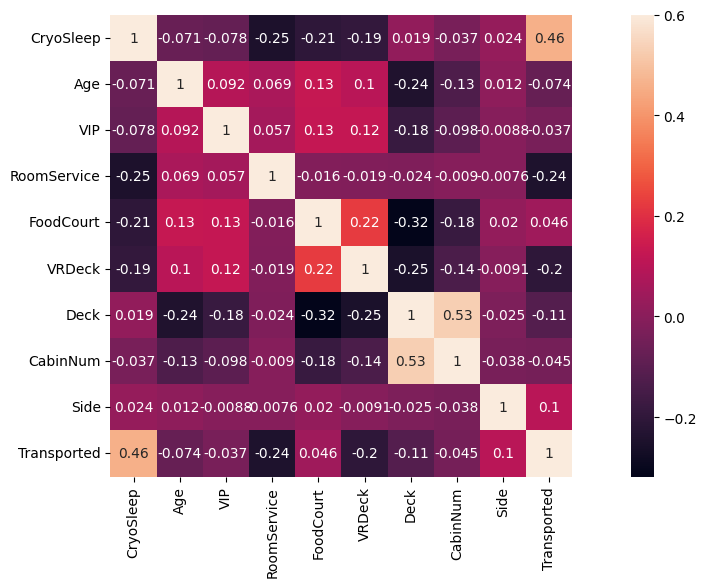

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

Unfortunately, it does appear that some of the new features do not exhibit strong correlations with the target variable. 

Let's try to combine RoomService, FoodCourt, VRDeck, etc. into an aggregate feature representing total spending:

In [17]:
train['TotalSpending'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

corr_matrix = train[["CryoSleep", "Age", "VIP", "TotalSpending", "Deck", "CabinNum", "Side", "Transported"]].corr()
corr_matrix

,CryoSleep,Age,VIP,TotalSpending,Deck,CabinNum,Side,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.376692,0.018806,-0.037084,0.023858,0.460132
Age,-0.071323,1.000000,0.091863,0.184628,-0.241540,-0.130702,0.011621,-0.074233
VIP,-0.078281,0.091863,1.000000,0.162987,-0.178205,-0.098493,-0.008798,-0.037261
TotalSpending,-0.376692,0.184628,0.162987,1.000000,-0.384201,-0.213494,0.003701,-0.199514
Deck,0.018806,-0.241540,-0.178205,-0.384201,1.000000,0.531449,-0.025316,-0.114941
CabinNum,-0.037084,-0.130702,-0.098493,-0.213494,0.531449,1.000000,-0.037996,-0.045097
Side,0.023858,0.011621,-0.008798,0.003701,-0.025316,-0.037996,1.000000,0.101397
Transported,0.460132,-0.074233,-0.037261,-0.199514,-0.114941,-0.045097,0.101397,1.000000


We can split the PassengerId to extract the first part to represent the group, belonging to the family and extract the size of the groups (Larger families or groups might have a different likelihood of being transported):

In [18]:
train['GroupID'] = train['PassengerId'].apply(lambda x: x.split('_')[0])
test['GroupID'] = test['PassengerId'].apply(lambda x: x.split('_')[0])

train['GroupSize'] = train.groupby('GroupID')['PassengerId'].transform('count')
test['GroupSize'] = test.groupby('GroupID')['PassengerId'].transform('count')

train['IsFamily'] = (train['GroupSize'] > 1).astype(int)
test['IsFamily'] = (test['GroupSize'] > 1).astype(int)

corr_matrix = train[["CryoSleep", "Age", "VIP", "TotalSpending", "Deck", "GroupID", "GroupSize", "IsFamily", "CabinNum", "Side", "Transported"]].corr()
corr_matrix


,CryoSleep,Age,VIP,TotalSpending,Deck,GroupID,GroupSize,IsFamily,CabinNum,Side,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.376692,0.018806,-0.006883,0.079363,0.091562,-0.037084,0.023858,0.460132
Age,-0.071323,1.000000,0.091863,0.184628,-0.241540,-0.009099,-0.176957,-0.133804,-0.130702,0.011621,-0.074233
VIP,-0.078281,0.091863,1.000000,0.162987,-0.178205,0.013608,0.002856,0.034027,-0.098493,-0.008798,-0.037261
TotalSpending,-0.376692,0.184628,0.162987,1.000000,-0.384201,0.003012,0.012330,0.062643,-0.213494,0.003701,-0.199514
Deck,0.018806,-0.241540,-0.178205,-0.384201,1.000000,-0.003836,-0.097997,-0.222749,0.531449,-0.025316,-0.114941
GroupID,-0.006883,-0.009099,0.013608,0.003012,-0.003836,1.000000,0.014753,0.000266,0.679723,-0.010562,0.021491
GroupSize,0.079363,-0.176957,0.002856,0.012330,-0.097997,0.014753,1.000000,0.721192,-0.049381,0.017522,0.082644
IsFamily,0.091562,-0.133804,0.034027,0.062643,-0.222749,0.000266,0.721192,1.000000,-0.134073,0.026463,0.113792
CabinNum,-0.037084,-0.130702,-0.098493,-0.213494,0.531449,0.679723,-0.049381,-0.134073,1.000000,-0.037996,-0.045097
Side,0.023858,0.011621,-0.008798,0.003701,-0.025316,-0.010562,0.017522,0.026463,-0.037996,1.000000,0.101397


But this did not lead to a good result.

We can try to apply log transformations that should help reduce the impact of outliers and make relationships more linear:

In [20]:
train['LogRoomService'] = np.log1p(train['RoomService'])
train['LogFoodCourt'] = np.log1p(train['FoodCourt'])
train['LogTotalSpending'] = np.log1p(train['TotalSpending'])

corr_matrix = train[["CryoSleep", "LogRoomService", "LogFoodCourt", "LogTotalSpending", "GroupID", "GroupSize", "Deck", "CabinNum", "Side", "Transported"]].corr()
corr_matrix

,CryoSleep,LogRoomService,LogFoodCourt,LogTotalSpending,GroupID,GroupSize,Deck,CabinNum,Side,Transported
CryoSleep,1.000000,-0.474061,-0.476359,-0.844771,-0.006883,0.079363,0.018806,-0.037084,0.023858,0.460132
LogRoomService,-0.474061,1.000000,0.090558,0.537942,0.001224,-0.123865,0.051181,0.059650,-0.023591,-0.362803
LogFoodCourt,-0.476359,0.090558,1.000000,0.617608,0.004122,-0.038230,-0.300120,-0.150030,0.010679,-0.135029
LogTotalSpending,-0.844771,0.537942,0.617608,1.000000,0.010673,-0.160479,-0.140221,-0.021254,-0.018549,-0.468941
GroupID,-0.006883,0.001224,0.004122,0.010673,1.000000,0.014753,-0.003836,0.679723,-0.010562,0.021491
GroupSize,0.079363,-0.123865,-0.038230,-0.160479,0.014753,1.000000,-0.097997,-0.049381,0.017522,0.082644
Deck,0.018806,0.051181,-0.300120,-0.140221,-0.003836,-0.097997,1.000000,0.531449,-0.025316,-0.114941
CabinNum,-0.037084,0.059650,-0.150030,-0.021254,0.679723,-0.049381,0.531449,1.000000,-0.037996,-0.045097
Side,0.023858,-0.023591,0.010679,-0.018549,-0.010562,0.017522,-0.025316,-0.037996,1.000000,0.101397
Transported,0.460132,-0.362803,-0.135029,-0.468941,0.021491,0.082644,-0.114941,-0.045097,0.101397,1.000000


It was good idea! Now we have not only one good correlation feature. This confirms that higher spending overall reduces the chance of being transported.

We can try to indicate the passenger's relative position on the spaceship with CabinNum:



In [21]:
train['CabinNum_scaled'] = (train['CabinNum'] - train['CabinNum'].min()) / (train['CabinNum'].max() - train['CabinNum'].min())

corr_matrix = train[["CryoSleep", "LogRoomService", "LogFoodCourt", "LogTotalSpending", "CabinNum_scaled", "Deck", "CabinNum", "Side", "Transported"]].corr()
corr_matrix

,CryoSleep,LogRoomService,LogFoodCourt,LogTotalSpending,CabinNum_scaled,Deck,CabinNum,Side,Transported
CryoSleep,1.000000,-0.474061,-0.476359,-0.844771,-0.037084,0.018806,-0.037084,0.023858,0.460132
LogRoomService,-0.474061,1.000000,0.090558,0.537942,0.059650,0.051181,0.059650,-0.023591,-0.362803
LogFoodCourt,-0.476359,0.090558,1.000000,0.617608,-0.150030,-0.300120,-0.150030,0.010679,-0.135029
LogTotalSpending,-0.844771,0.537942,0.617608,1.000000,-0.021254,-0.140221,-0.021254,-0.018549,-0.468941
CabinNum_scaled,-0.037084,0.059650,-0.150030,-0.021254,1.000000,0.531449,1.000000,-0.037996,-0.045097
Deck,0.018806,0.051181,-0.300120,-0.140221,0.531449,1.000000,0.531449,-0.025316,-0.114941
CabinNum,-0.037084,0.059650,-0.150030,-0.021254,1.000000,0.531449,1.000000,-0.037996,-0.045097
Side,0.023858,-0.023591,0.010679,-0.018549,-0.037996,-0.025316,-0.037996,1.000000,0.101397
Transported,0.460132,-0.362803,-0.135029,-0.468941,-0.045097,-0.114941,-0.045097,0.101397,1.000000


**Summary**:

1. **EDA**:

a. The data was loaded and inspected to get an initial understanding of its structure and content;

b. Missing values were identified in key features, and appropriate imputation strategies were applied to handle them (mode for categorical, median for numerical);

c. Basic statistics of the dataset were explored using describe() to examine the distributions of features.

2. **Feature Engineering**:

a. The Cabin feature was split into three components: Deck, CabinNum, and Side. A new feature CabinNum_scaled was created by normalizing the cabin number to represent the passenger’s relative position on the spaceship; 

b. A new feature TotalSpending was generated by summing spending-related features to capture overall passenger spending;

c. From the PassengerId, additional features GroupID, GroupSize, and IsFamily were created. IsFamily indicates whether the passenger is traveling in a group. 

3. **Analysis of Correlations and Feature Significance**:

a. **CryoSleep** was identified as the strongest predictor of whether a passenger was transported, showing a significant positive correlation with the target variable;

b. **TotalSpending** exhibited a negative correlation with being transported, indicating that higher spending overall reduced the likelihood of transport;

c. **VIP and Age** showed weak correlations with the target, suggesting they are less influential in determining transport likelihood;

d. **LogTotalSpending**: Log transformations of spending features were applied to reduce the impact of outliers and better capture relationships with the target, improving correlations;

e. **Deck, CabinNum, Side**: After splitting and encoding these features, their correlations with the target were found to be low, meaning they do not have a strong influence on whether a passenger is transported.